## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [1]:
!pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (19/19), 3.30 MiB | 127.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


## Task 2 : Loading VGG Pretrained Model

In [ ]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
for parameters in vgg.parameters():

    parameters.requires_grad_(False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [ ]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size = 500):

    img = Image.open(img_path).convert("RGB")

    if max(img.size) > max_size:
        size = max_size
    else:
        size = max(img.size)

    img_transforms = T.Compose([
                        
                        T.Resize(size),
                        T.ToTensor(),
                        T.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    ])

    image = img_transforms(img)

    image = image.unsqueeze(0)

    return image

In [ ]:
content_p = preprocess("/content/Project-NST/content11.jpg")
style_p = preprocess("/content/Project-NST/style11.jpg")

content_p = content_p.to(device)
style_p = style_p.to(device)

print("Content shape:", content_p.shape)
print("Style shape:", style_p.shape)

Content shape: torch.Size([1, 3, 259, 345])
Style shape: torch.Size([1, 3, 500, 577])


## Task 4 : Deprocess image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):

    image = tensor.to("cpu")
    image = image.numpy()
    image = image.squeeze(0)
    image = image.transpose(1, 2, 0)
    image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    image = image.clip(0,1)

    return image

In [ ]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("Content shape:", content_d.shape)
print("Style shape:", style_d.shape)

Content shape: (259, 345, 3)
Style shape: (500, 577, 3)


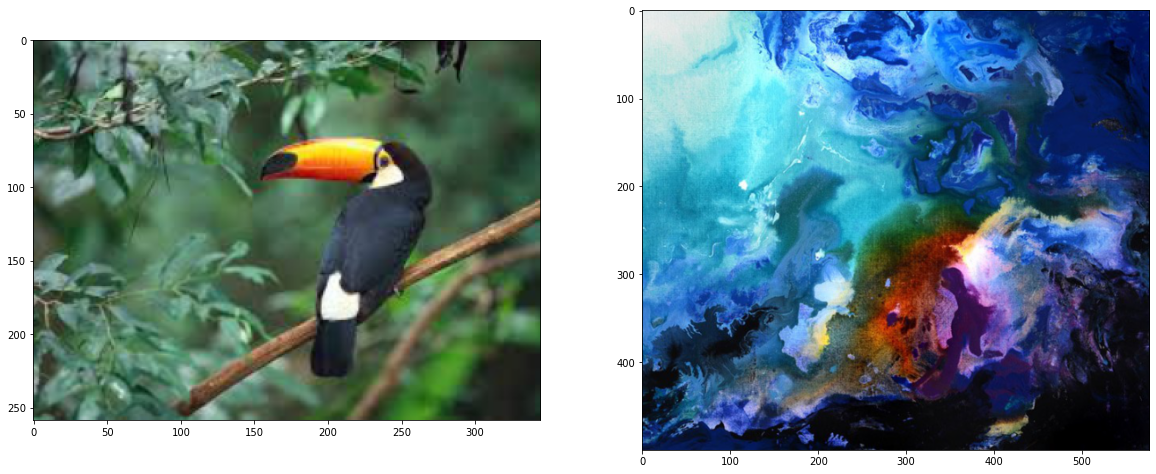

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [ ]:
def get_features(image, model):

    layers = {
        "0": "conv1_1",
        "5": "conv2_1",
        "10": "conv3_1",
        "19": "conv4_1",
        "21": "conv4_2",
        "28": "conv5_1"
    }

    x = image
    Features = {}

    for name, layer in model._modules.items():
        x = layer(x)

        if name in layers:
            Features[layers[name]] = x

    return Features

In [ ]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

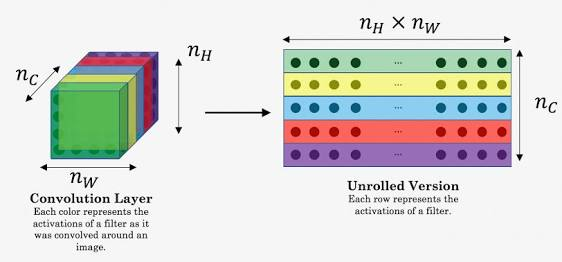

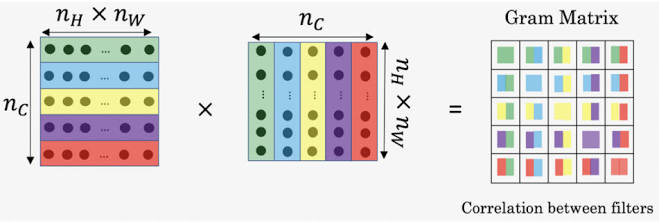

In [ ]:
def gram_matrix(tensor):

    b, c, h, w = tensor.size()
    tensor = tensor.view(c, h*w)
    gram = torch.mm(tensor, tensor.t())

    return gram

In [ ]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [ ]:
def content_loss(target_conv4_2, content_conv4_2):

    loss = torch.mean((target_conv4_2 - content_conv4_2) ** 2)

    return loss

In [ ]:
style_weights = {
    "conv1_1": 1.0,
    "conv2_1": 0.75,
    "conv3_1": 0.2,
    "conv4_1": 0.2,
    "conv5_1": 0.2
}

In [ ]:
def style_loss(style_weights, target_features, style_grams):

    loss = 0

    for layer in style_weights:
        target_f = target_features[layer]
        target_gram = gram_matrix(target_f)
        style_gram = style_grams[layer]
        b, c, h, w = target_f.shape
        layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        loss += layer_loss/(c*h*w)

    return loss

In [ ]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)

print("Content loss:", content_loss(target_f["conv4_2"], content_f["conv4_2"]))
print("Style loss:", style_loss(style_weights, target_f, style_grams))

Content loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style loss: tensor(2837.5432, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [ ]:
from torch import optim

optimizer = optim.Adam([target], lr=0.003)

alpha = 1
beta = 1e5

epochs = 3000
show_every = 500

In [ ]:
def total_loss(alpha, beta, s_loss, c_loss):

    loss = c_loss * alpha + s_loss * beta
    return loss

In [ ]:
results = []

for i in range(epochs):

    target_f = get_features(target, vgg)

    c_loss = content_loss(target_f["conv4_2"], content_f["conv4_2"])
    s_loss = style_loss(style_weights, target_f, style_grams)
    t_loss = total_loss(alpha, beta, s_loss, c_loss)

    optimizer.zero_grad()
    t_loss.backward()
    optimizer.step()

    if i % show_every == 0:
        print(f"Total loss at Epoch {i}: {t_loss}")
        results.append(deprocess(target.detach()))

Total loss at Epoch 0: 283754336.0
Total loss at Epoch 500: 20907796.0
Total loss at Epoch 1000: 9370532.0
Total loss at Epoch 1500: 7143098.0
Total loss at Epoch 2000: 5866966.5
Total loss at Epoch 2500: 5045917.5


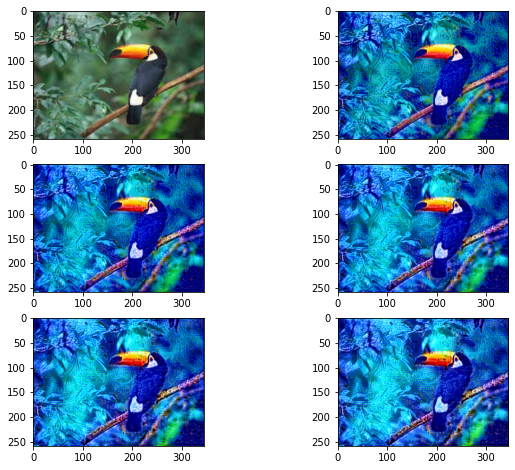

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(len(results)):
    plt.subplot(3,2,i+1)
    plt.imshow(results[i])

plt.show()

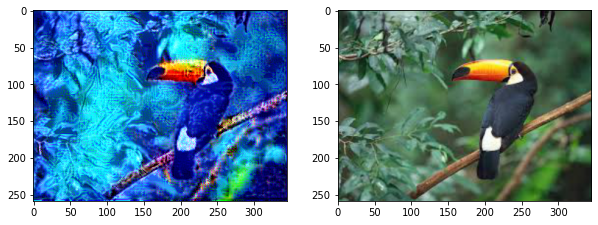

In [ ]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)